In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the files 

In [59]:
df=pd.read_csv('50_startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# head

In [60]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# tail

In [61]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# check size and shape

In [62]:
df.size

250

In [63]:
df.shape

(50, 5)

# check information about dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# handle missing values

In [65]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

###  Info shows no missing values.

# Univariate Analysis

### check the sqewness
#### 1.Bar ploot
#### 2.hist plot
#### 3.dist plot

C:\Users\Pradnya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


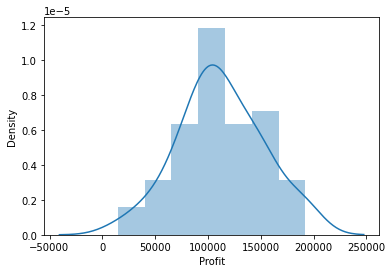

In [66]:
sns.distplot(df['Profit']); # Profit is target column

##  data is normally distributed

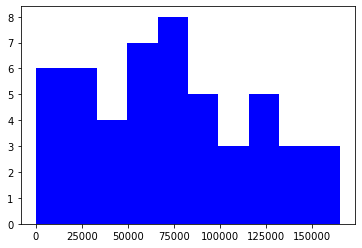

In [67]:
plt.hist(df['R&D Spend'], color='blue');

## conclusion- data is normaly distributed

# Bivariate analysis

## cheack the corelation between the columns
#### done by
#### 1.heat map
#### 2.pairplot
#### 3.box plot
#### 4.violin plot

In [68]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


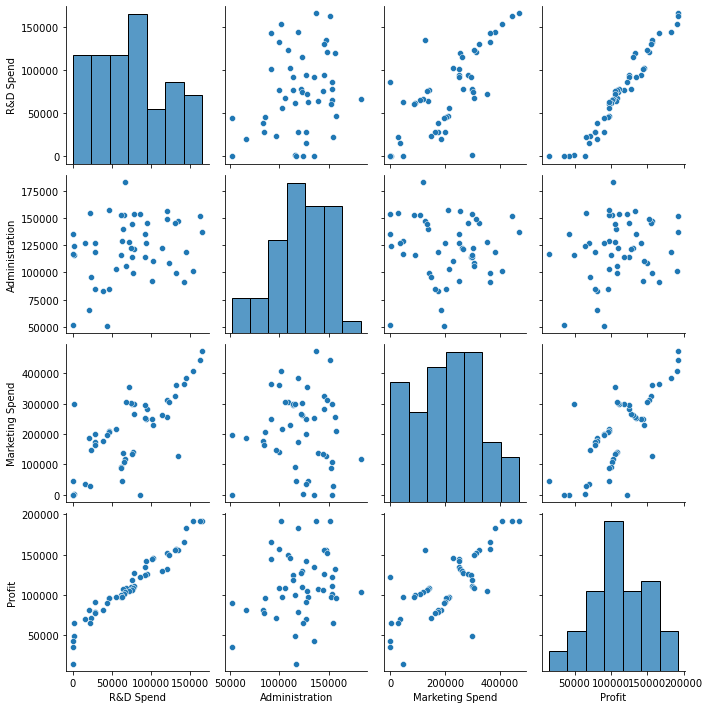

In [69]:
sns.pairplot(data=df);

In [70]:
1 parameter should be linear to the other

SyntaxError: invalid syntax (<ipython-input-70-559dd7d42ec7>, line 1)

In [ ]:
sns.heatmap(df.corr(),annot = True);

##Conclusion: R&D Spend seems to be most correlated with sales as 0.97 is very close to 1

### Dataset shows  a categorical data so its need to be handle it by get dummies.


# Handle categorical data

# categorical data 
### handles by
#### 1. get_dummies
#### 2.Factorisation
#### 3.Encoders

In [71]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [72]:
df1=pd.get_dummies(df['State'])
df1.head(5)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [73]:
df2=pd.concat([df,df1],axis=1)
df2.head(5)


,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [74]:
df2.drop(['State'],axis=1)
df2.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


# Machine learning steps

## Standardisation
#### 1. MinMax scalar
#### 2. standardisation

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [76]:
df.corr()['Profit']

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

In [77]:
x = df[['R&D Spend']]
y = df['Profit']

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(x)

## bifurcation of data into train and test data
#### type of sampling:
##### 1.simple random
##### 2.clustering
##### 3.Stratified

In [79]:
# step 2:-convert data into train and test
x_train,x_test,y_train,y_test=train_test_split(std,y,test_size=0.2,random_state=100)

# model building

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# select x and Y

In [81]:
#Step 1: select dependent and independent variables (ie. x and y)
#setting the value for x and y
#x = sales['TV'].values.reshape(-1,1)
x = df[['R&D Spend']]
y = df['Profit']

In [82]:
# Step 3: Model Instantiation
slr=LinearRegression()

In [83]:
# Step 4: fit the model with train data
slr.fit(x_train,y_train)

LinearRegression()

In [84]:
# Printing the model coefficients
print('Intercept:',slr.intercept_)
print('Coefficient:',slr.coef_)

Intercept: 112391.90112917451
Coefficient: [38574.9122207]


In [85]:
print('regression Equation: Sales = 48230.30 + 0.87 *R&D Spend')

regression Equation: Sales = 48230.30 + 0.87 *R&D Spend


# # line of best fit

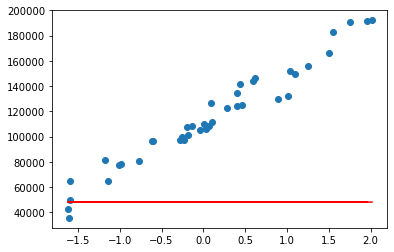

In [86]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 48230.30 + 0.87 * x_train,'r')
plt.show();

In [87]:
# prediction of testand training set result
y_pred_slr = slr.predict(x_test)
#x_pred_slr = slr.predict(x_train)

# predict train and test by R2_Score

In [88]:
from sklearn.metrics import r2_score
y_test_pred = slr.predict(x_test)

y_train_pred = slr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

Training = 0.9573947597273696 testing = 0.8944717635298023


# conclusion - 93.78%  data fit for this regression model.

In [89]:
meanAbErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqerr = metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr = np.sqrt(meanSqerr)
print('Mean Absolute Error:',meanAbErr)
print('mean Squared Error:',meanSqerr)
print('Root Mean Squared Error:',rootMeanSqErr)

Mean Absolute Error: 8223.118954300551
mean Squared Error: 167291828.55723804
Root Mean Squared Error: 12934.134240730535


# multiple linear regression

In [90]:
# setting the x and y value
x = df[['R&D Spend','Marketing Spend']]

y = df['Profit']

In [91]:
#Step 2: bifurcation of data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

In [92]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [93]:
# Printing the model coefficients
print('Intercept:',mlr.intercept_)
print('Coefficient:',mlr.coef_)

Intercept: 48376.545790768476
Coefficient: [0.79953303 0.02395382]


In [94]:
y_pred_mlr = mlr.predict(x_test)

In [95]:
y_pred_mlr

array([159065.35774782,  76111.92354786,  88331.53296809, 104017.01802271,
        61625.06806585,  49458.61295973, 162508.39762332,  97887.11458692,
       116498.17936853,  70823.44156997])

# predict train and test by R2_score

In [96]:
from sklearn.metrics import r2_score
y_test_pred=mlr.predict(x_test)
y_train_pred=mlr.predict(x_train)
a=r2_score(y_train,y_train_pred)
print('training = {} testing= {}'.format(a,b))

training = 0.9600071976062267 testing= 0.8944717635298023


## data is overfited

# conclusion - 95.63%  data fit for this regression model.

## Regularisation methods

In [97]:
from sklearn import linear_model
lasso_reg= linear_model.Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

In [98]:
lasso_reg.score(x_train,y_train)

0.9600071976062267

In [99]:
lasso_reg.score(x_test,y_test)

0.9030763874913694

In [100]:
# L1 = Ridge regression

In [101]:
ridge_reg=linear_model.Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [102]:
ridge_reg.score(x_train,y_train)

0.9600071976062267

In [103]:
ridge_reg.score(x_test,y_test)

0.9030763875359268